## Empezando con sklearn para SVM

In [0]:
# cargar librerias
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib import pyplot as plt

# Carga datos con solo dos clases y dos características
iris = datasets.load_iris()
X = iris.data[:1000,:2]
y = iris.target[:1000]

# Funciones estandarizadas
scaler = StandardScaler()
X_std = scaler.fit_transform(X)


# Crear soporte clasificador de vectores.
svc = LinearSVC(C=7.0)

# Train model
model = svc.fit(X_std, y)




## Límite de Decisión Hiperplano
En esta visualización, todas las observaciones de la clase 0 son negras y las observaciones de la clase 1 son de color gris claro. El hiperplano es el límite de decisión que decide cómo se clasifican las nuevas observaciones. Específicamente, cualquier observación sobre la línea se clasificará como clase 0, mientras que cualquier observación debajo de la línea se clasificará como clase

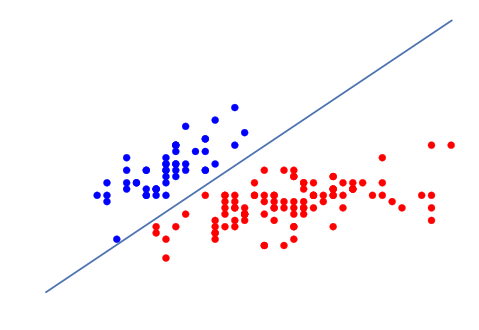

In [0]:
# Plot data points and color using their class
# color = ['black' if c == 0 else 'lightgrey' for c in y]
color = ['blue' if c == 0 else 'red' for c in y]

plt.scatter(X_std[:,0], X_std[:,1], c=color)

# Create the hyperplane
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("off"), plt.show();

## Ejemplos SVM: máximo margen de separacion del hiperplano


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
# creamos 1000 puntos
X, y = make_blobs(n_samples=1000, centers=2, random_state=6)


print(X.shape)
print(y.shape)

(1000, 2)
(1000,)


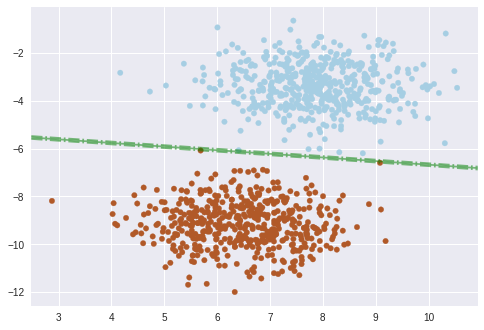

In [0]:
#ajusta el modelo
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
# plotea la decision funcion
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# crea la malla para evaluar el modelo
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
# plotea decision margenes y fronteras
ax.contour(XX, YY, Z, colors='g', levels=[-1, 0, 1], alpha=0.5, linestyles=['-.', '-', '-.'])
# plotea support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none')
plt.show()

## otro ejempo

In [0]:
# importing scikit learn with make_blobs
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

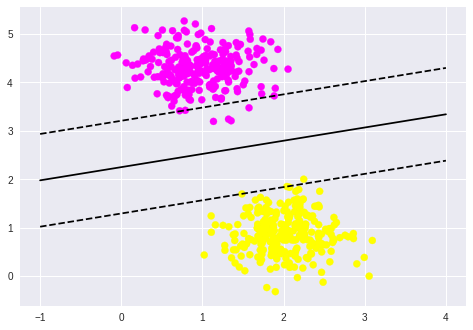

In [0]:
# Y containing two classes
X, y = make_blobs(n_samples=500, centers=2, random_state=0, cluster_std=0.40)
# plotting our dataset 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring');
df = pd.DataFrame(dict(feature1=X[:,0], feature2=X[:,1], category=y))


#split my data set into 80% training and 20% test data
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(df[['feature1','feature2']], df['category'], test_size = 0.20)
# #the SVM classification of dataset
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)


w = svclassifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-1, 4)
yy = a * xx - (svclassifier.intercept_[0]) / w[1]
b = svclassifier.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = svclassifier.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])
# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(svclassifier.support_vectors_[:, 0], svclassifier.support_vectors_[:, 1],
            s=80, facecolors='none')

In [0]:
from sklearn.metrics import classification_report
#evaluating our model for prediction accuracy
print(classification_report(y_test, y_pred))

# ejemplo con data

Ahora, intentemos implementar SVM en un conjunto de datos del mundo real. Para nuestro análisis usaremos el famoso conjunto de datos Iris, que consta de 50 muestras de cada una de las tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midieron cuatro características de cada muestra: la longitud y el ancho de los sépalos y pétalos, en centímetros. Sobre la base de la combinación de estas cuatro características, construiremos un modelo SVM para distinguir las especies entre sí.

In [0]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
#the imported dataset does not have the required column names so lets add it
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
irisdata = pd.read_csv(url, names=colnames)
X = irisdata.drop('Class', axis=1) #x contains all the features
y = irisdata['Class'] #contains the categories

irisdata.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


##Parámetros de SVC cuando se usa el kernel RBF

En este tutorial, exploraremos visualmente los efectos de los dos parámetros del clasificador de vectores de soporte (SVC) cuando usemos el núcleo de función de base radial (RBF). Este tutorial se basa en gran medida en el código utilizado en el libro Python Machine Learning de Sebastian Raschka.

In [0]:
# Import packages to visualize the classifer
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings

# Import packages to do the classifying
import numpy as np
from sklearn.svm import SVC

##Crear función para visualizar las regiones de clasificación
Puedes ignorar el siguiente código. Se utiliza para visualizar las regiones de decisión del clasificador. Sin embargo, no es importante para este tutorial entender cómo funciona la función.

In [0]:
def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

##Generar datos
Aquí estamos generando algunos datos no linealmente separables en los que entrenaremos a nuestro clasificador. Estos datos serían similares a su conjunto de datos de entrenamiento. Hay dos clases en nuestro vector y: x azul y cuadrados rojos.

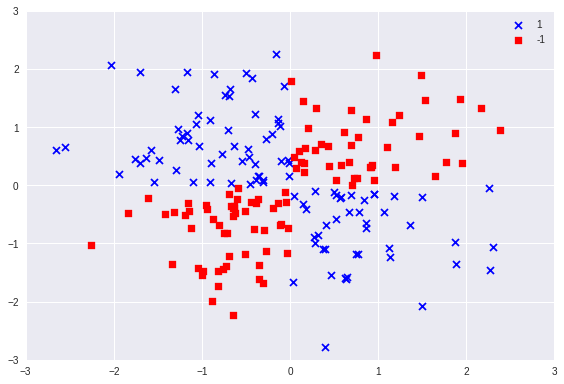

In [0]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

##Clasificar utilizando un kernel lineal
La forma más básica de usar un SVC es con un kernel lineal, lo que significa que el límite de decisión es una línea recta (o un hiperplano en dimensiones más altas). Los kernels lineales rara vez se usan en la práctica, sin embargo, quería mostrarlo aquí, ya que es la versión más básica de SVC. Como se puede ver a continuación, no es muy bueno para clasificar (lo que pueden ver todas las X azules en la región roja) porque los datos no son lineales.

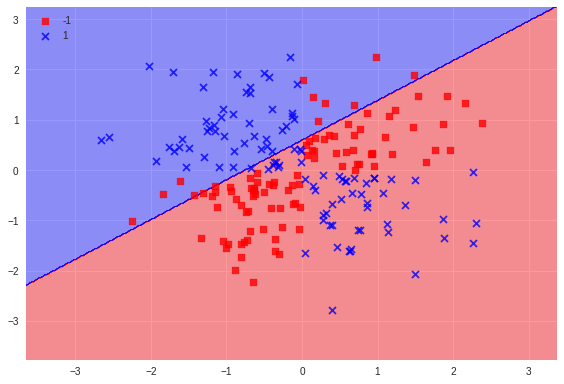

In [0]:
# Create a SVC classifier using a linear kernel
svm = SVC(kernel='linear', C=1, random_state=0)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

##Gamma = 0.01
En el caso de nuestro clasificador y datos SVC, cuando se utiliza un gamma bajo como 0.01, el límite de decisión no es muy "curvilínea", sino que es solo un gran arco de barrido.

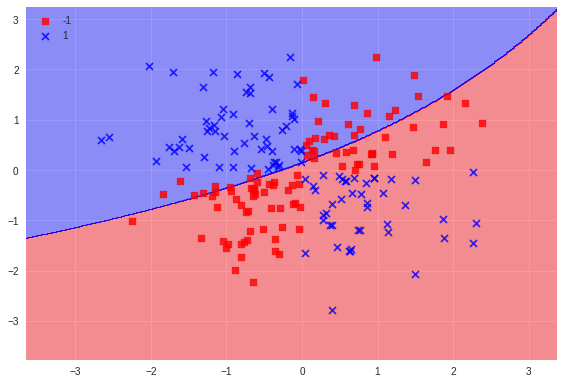

In [0]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

##Gamma = 1.0
Puede ver una gran diferencia cuando aumentamos la gama a 1. Ahora el límite de decisión está comenzando a cubrir mejor la extensión de los datos.

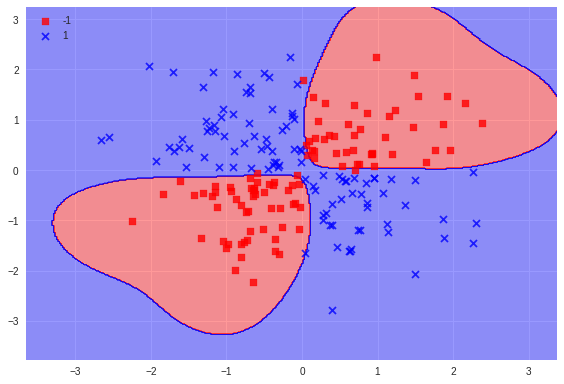

In [0]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=1, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

##
Gamma = 10.0
En gamma = 10 la propagación del núcleo es menos pronunciada. El límite de decisión comienza a ser altamente afectado por puntos de datos individuales (es decir, varianza).

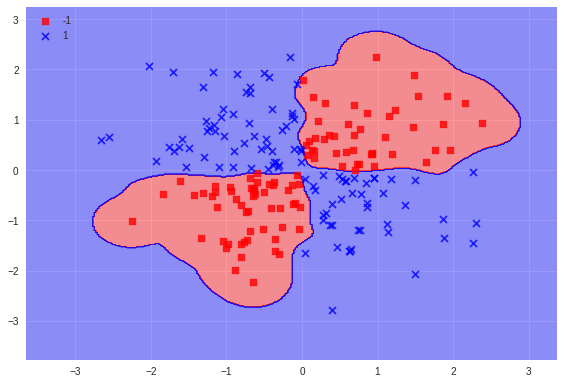

In [0]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=10, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

##Gamma = 100.0
Con gamma alta, el límite de decisión depende casi totalmente de los puntos de datos individuales, creando "islas". Esta información está claramente superpuesta.

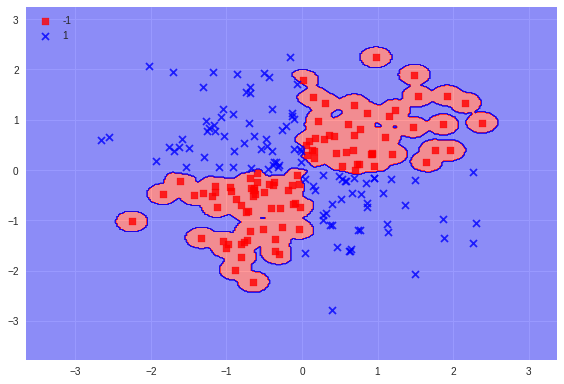

In [0]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=100, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# New Section

## C - El parámetro de penalización
Ahora repetiremos el proceso para C: usaremos el mismo clasificador, los mismos datos y manteneremos la constante gamma. Lo único que cambiaremos es la C, la penalización por error de clasificación.

## C = 1
Con C = 1, el clasificador es claramente tolerante con los puntos de datos clasificados erróneamente. Hay muchos puntos rojos en la región azul y puntos azules en la región roja.

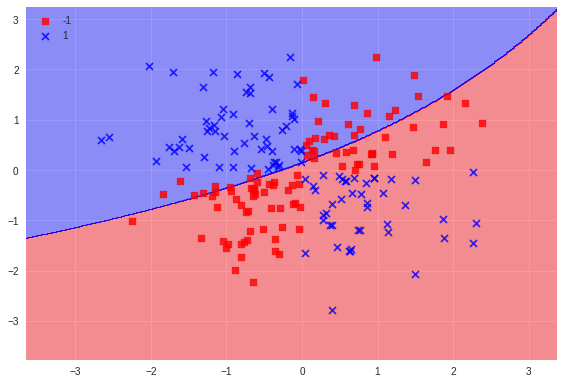

In [0]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

##C = 10
En C = 10, el clasificador es menos tolerante a los puntos de datos clasificados erróneamente y, por lo tanto, el límite de decisión es más grave.

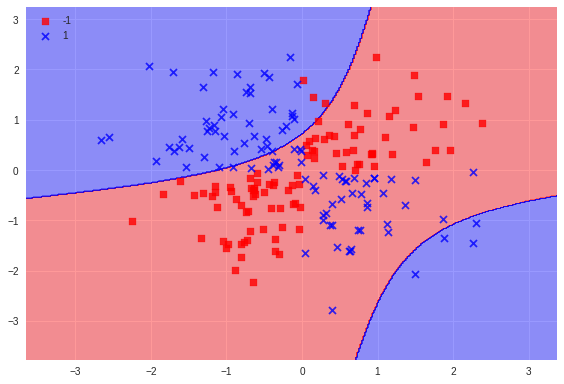

In [0]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=10)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

##C = 1000
Cuando C = 1000, el clasificador comienza a ser muy intolerante a los puntos de datos clasificados erróneamente y, por lo tanto, el límite de decisión se vuelve menos sesgado y tiene más varianza (es decir, más dependiente de los puntos de datos individuales).

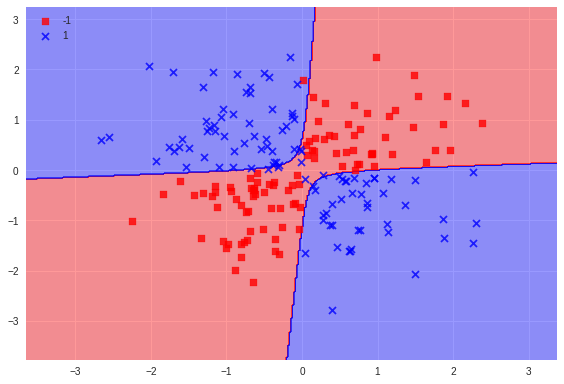

In [0]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=1000)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

##C = 10000
En C = 10000, el clasificador "trabaja muy duro" para no clasificar erróneamente los puntos de datos y vemos signos de exceso de ajuste.

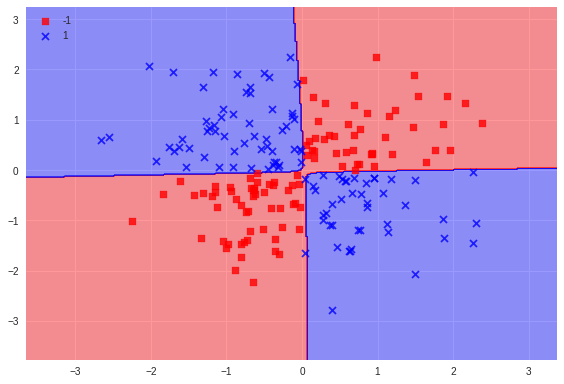

In [0]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=10000)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

##C = 100000
En C = 100000, el clasificador está fuertemente penalizado por cualquier punto de datos mal clasificado y, por lo tanto, los márgenes son pequeños

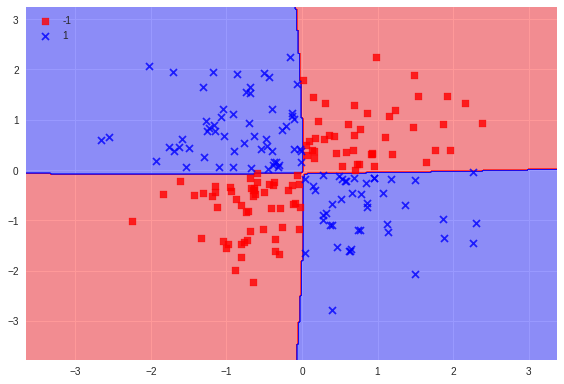

In [0]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=100000)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

**Trazar diferentes clasificadores SVM en el conjunto de datos del iris
**


Comparación de diferentes clasificadores SVM lineales en una proyección 2D del conjunto de datos del iris. Solo consideramos las 2 primeras características de este conjunto de datos:

    Longitud del sépalo
    Ancho sepal

Automatically created module for IPython interactive environment


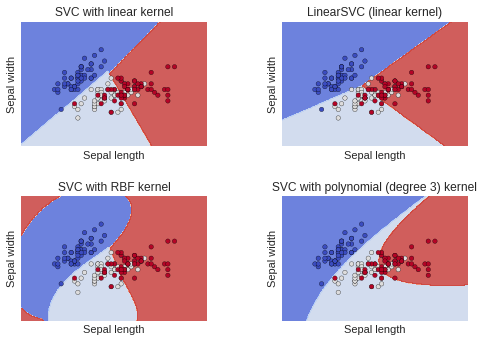

In [0]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

**Entrenamiento SVM con kernel lineal**

Ahora que aprendimos la teoría básica del kernel lineal SVM, entrenemos un modelo SVM para clasificar nuestro conjunto de datos de iris:



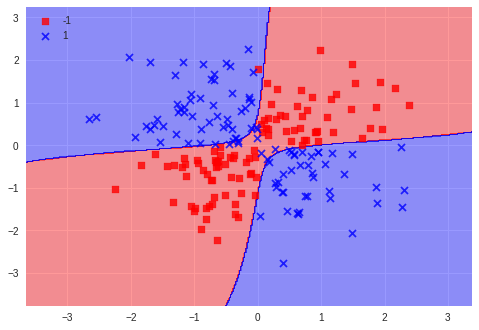

In [0]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot all samples
   X_test, y_test = X[test_idx, :], y[test_idx]
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)
   # highlight test samples
   if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1], c='',
               alpha=1.0, linewidth=1, marker='o',
               s=55, label='test set')

# create xor dataset
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

# SVM
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)

# draw decision boundary
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


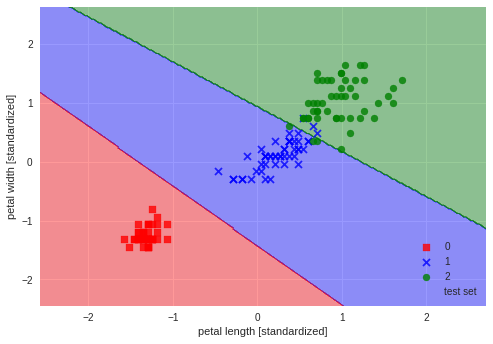

In [0]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

# Decision region drawing
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'green', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot all samples
   X_test, y_test = X[test_idx, :], y[test_idx]
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)
   # highlight test samples
   if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1], c='',
               alpha=1.0, linewidth=1, marker='o',
               s=55, label='test set')

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std,
                      y_combined, classifier=svm,
                      test_idx=range(105,150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='lower right')
plt.show()

In [0]:
iris = datasets.load_iris()
# X = iris.data[:, [2, 3]]
X = iris.data[:, [0, 1]]
y = iris.target

**RBF kernel SVM para conjunto de datos de iris**

En esta sección, aplicaremos RMF kernel SVM a nuestro conjunto de datos de flor de Iris:

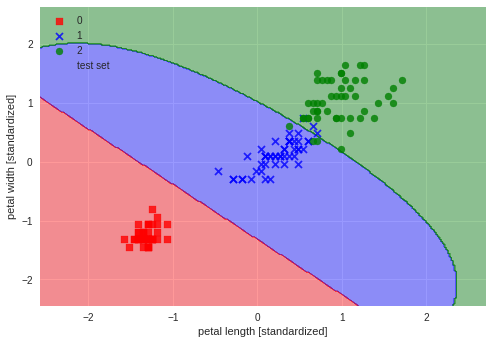

In [0]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'green', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot all samples
   X_test, y_test = X[test_idx, :], y[test_idx]
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)
   # highlight test samples
   if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1], c='',
               alpha=1.0, linewidth=1, marker='o',
               s=55, label='test set')

from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# SVM
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, gamma=0.20, C=10.0)
svm.fit(X_train_std, y_train)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# draw decision boundary
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm,
                      test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

Si aumentamos el valor de gamma y observar el efecto en el límite de decisión:

Como podemos ver en la imagen de arriba, el límite de decisión en torno a las clases 0 y 1 es mucho más estricto con un valor relativamente grande de gamma


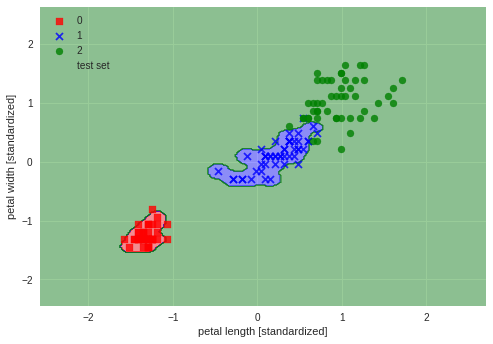

In [0]:
svm = SVC(kernel='rbf', random_state=0, gamma=100.0, C=10.0)
svm.fit(X_train_std, y_train)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# draw decision boundary
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm,
                      test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

# Polynomial Kernel

In [0]:
import numpy as np
import pandas as pd
from matplotlib import style
from sklearn.svm import SVC
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)
style.use('ggplot')

#data = pd.read_csv('polydata2.csv', header=None)

# Cargar el Drive helper y mount
from google.colab import drive

# Link y Codigo de autorizacion.
drive.mount('/content/drive_all')

# Cargar datos del google drive
data = pd.read_csv('/content/drive_all/My Drive/PYTHON/dataset/polydata2.csv')



data.head()


KeyboardInterrupt: ignored

In [0]:

X = data.values[:, :2]
y = data.values[:, 2]

def draw_svm(X, y, C=1.0):
    plt.scatter(X[:,0], X[:,1], c=y)
    clf = SVC(kernel='poly', C=C)
    clf_fit = clf.fit(X, y)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='r', levels=[-1, 0, 1], 
                        alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], 
                clf.support_vectors_[:, 1], 
                s=100, linewidth=1, facecolors='none')
    plt.show()
    return clf_fit

NameError: ignored

In [0]:
clf = draw_svm(X, y)
score = clf.score(X, y)
pred = clf.predict([(-130, 110), (-170, -160), (80, 90), (-280, 20)])
print(score)
print(pred)

NameError: ignored

#Kernel Gaussiano


In [0]:
import numpy as np
import pandas as pd
from matplotlib import style
from sklearn.svm import SVC
from sklearn.datasets import make_classification, make_blobs, make_moons
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)
style.use('ggplot')

X, y = make_moons(n_samples=200)

In [0]:

# Auto gamma equals 1/n_features
def draw_svm(X, y, C=1.0, gamma='auto'):
    plt.scatter(X[:,0], X[:,1], c=y)
    clf = SVC(kernel='rbf', C=C, gamma=gamma)
    clf_fit = clf.fit(X, y)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='b', levels=[-1, 0, 1], 
                        alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], 
                clf.support_vectors_[:, 1], 
                s=100, linewidth=1, facecolors='none')
    plt.show()
    return clf_fit

In [0]:
clf_arr = []
clf_arr.append(draw_svm(X, y, 0.01))
clf_arr.append(draw_svm(X, y, 0.1))
clf_arr.append(draw_svm(X, y, 1))
clf_arr.append(draw_svm(X, y, 10))

for i, clf in enumerate(clf_arr):
    print(clf.score(X, y))

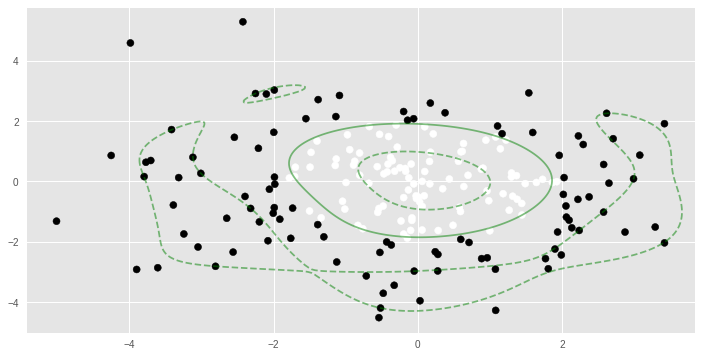

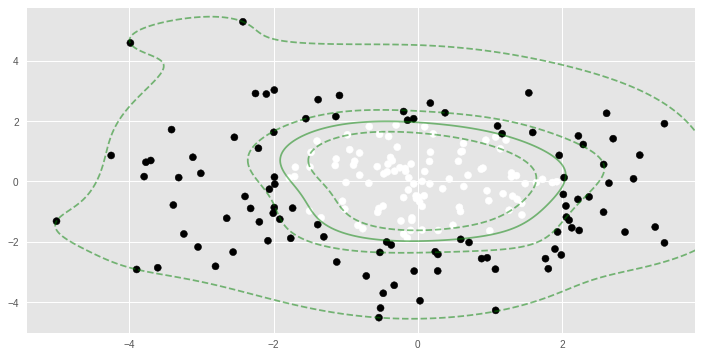

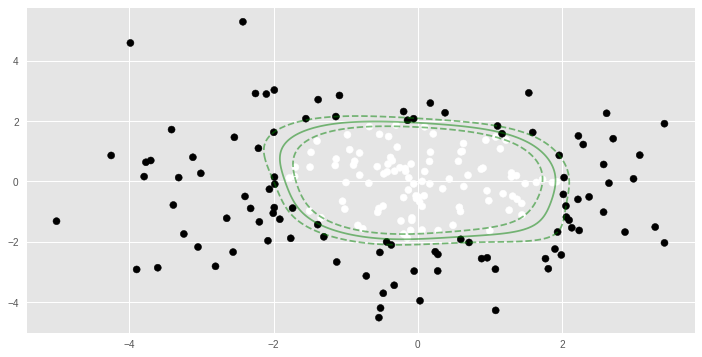

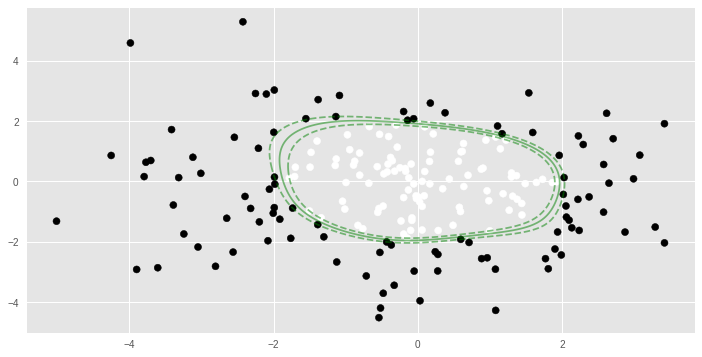

0.965
0.99
0.99
1.0


In [0]:
import numpy as np
import pandas as pd
from matplotlib import style
from sklearn.svm import SVC
from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)
style.use('ggplot')

X, y = make_gaussian_quantiles(n_samples=200, n_features=2, n_classes=2, cov=3)

# Auto gamma equals 1/n_features
def draw_svm(X, y, C=1.0, gamma='auto'):
    plt.scatter(X[:,0], X[:,1], c=y)
    clf = SVC(kernel='rbf', C=C, gamma=gamma)
    clf_fit = clf.fit(X, y)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='g', levels=[-1, 0, 1], 
                        alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], 
                clf.support_vectors_[:, 1], 
                s=100, linewidth=1,  facecolors='none')#cmap='spring'
    plt.show()
    return clf_fit

clf_arr = []
clf_arr.append(draw_svm(X, y, 0.1))
clf_arr.append(draw_svm(X, y, 1))
clf_arr.append(draw_svm(X, y, 10))
clf_arr.append(draw_svm(X, y, 100))

for i, clf in enumerate(clf_arr):
    print(clf.score(X, y))


# SVM: muestras ponderadas
Representación gráfica de la función de decisión de un conjunto de datos ponderado, donde el tamaño de los puntos es proporcional a su peso.

La ponderación de la muestra vuelve a escalar el parámetro C, lo que significa que el clasificador pone más énfasis en obtener estos puntos correctamente. El efecto a menudo puede ser sutil. Para enfatizar el efecto aquí, destacamos especialmente los valores atípicos, lo que hace que la deformación del límite de decisión sea muy visible.

Automatically created module for IPython interactive environment


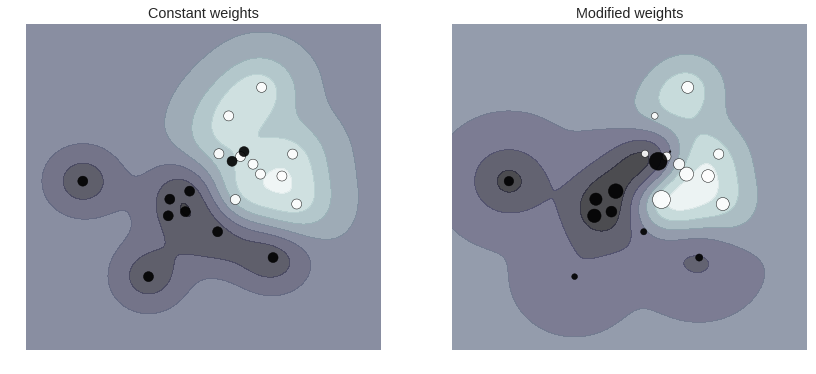

In [0]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


def plot_decision_function(classifier, sample_weight, axis, title):
    # plot the decision function
    xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))

    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot the line, the points, and the nearest vectors to the plane
    axis.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bone)
    axis.scatter(X[:, 0], X[:, 1], c=y, s=100 * sample_weight, alpha=0.9,
                 cmap=plt.cm.bone, edgecolors='black')

    axis.axis('off')
    axis.set_title(title)


# we create 20 points
np.random.seed(0)
X = np.r_[np.random.randn(10, 2) + [1, 1], np.random.randn(10, 2)]
y = [1] * 10 + [-1] * 10
sample_weight_last_ten = abs(np.random.randn(len(X)))
sample_weight_constant = np.ones(len(X))
# and bigger weights to some outliers
sample_weight_last_ten[15:] *= 5
sample_weight_last_ten[9] *= 15

# for reference, first fit without sample weights

# fit the model
clf_weights = svm.SVC(gamma=1)
clf_weights.fit(X, y, sample_weight=sample_weight_last_ten)

clf_no_weights = svm.SVC(gamma=1)
clf_no_weights.fit(X, y)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_decision_function(clf_no_weights, sample_weight_constant, axes[0],
                       "Constant weights")
plot_decision_function(clf_weights, sample_weight_last_ten, axes[1],
                       "Modified weights")

plt.show()

Este ejemplo ilustra el efecto de los parámetros `` gamma`` y `` C`` de
el kernel SVM de la función de base radial (RBF).

Intuitivamente, el parámetro `` gamma`` define hasta qué punto la influencia de un solo
el ejemplo de entrenamiento alcanza, con valores bajos que significan 'lejos' y valores altos que significan
'cerrar'. Los parámetros `` gamma`` pueden verse como el inverso del radio de
Influencia de las muestras seleccionadas por el modelo como vectores de soporte.

El parámetro `` C`` cambia la clasificación correcta de los ejemplos de entrenamiento
Contra la maximización del margen de la función de decisión. Para valores mayores de
`` C``, se aceptará un margen menor si la función de decisión es mejor en
Clasificando correctamente todos los puntos de entrenamiento. Un `` C`` más bajo fomentará un
Mayor margen, por lo tanto, una función de decisión más simple, a costa de la capacitación.
exactitud. En otras palabras, `` C`` se comporta como un parámetro de regularización en el
SVM.

In [0]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV


# Utility function to move the midpoint of a colormap to be around
# the values of interest.

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

# #############################################################################

# Cargar y preparar el conjunto de datos.
#
# conjunto de datos para la búsqueda de cuadrícula

iris = load_iris()
X = iris.data
y = iris.target


# Conjunto de datos para la visualización de la función de decisión: solo conservamos los dos primeros
# características en X y sub-muestra el conjunto de datos para mantener solo 2 clases y
# convertirlo en un problema de clasificación binaria.

X_2d = X[:, :2]
X_2d = X_2d[y > 0]
y_2d = y[y > 0]
y_2d -= 1


Automatically created module for IPython interactive environment


The best parameters are {'C': 1.0, 'gamma': 0.1} with a score of 0.97


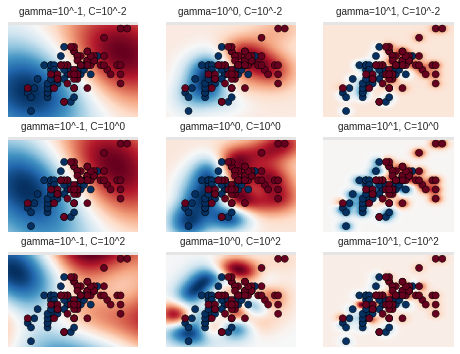

In [0]:
# Por lo general, es una buena idea escalar los datos para el entrenamiento de SVM.
# Estamos engañando un poco en este ejemplo al escalar todos los datos,
# en lugar de ajustar la transformación en el conjunto de entrenamiento y
# simplemente aplicándolo en el conjunto de prueba.

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_2d = scaler.fit_transform(X_2d)

# #############################################################################
# Train classifiers
#
# Para una búsqueda inicial, una cuadrícula logarítmica con base.
# 10 es a menudo útil. Usando una base de 2, una más fina Se puede lograr
# tuning pero a un costo mucho mayor.

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

# Now we need to fit a classifier for all parameters in the 2d version
# (we use a smaller set of parameters here because it takes a while to train)

C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_2d, y_2d)
        classifiers.append((C, gamma, clf))

# #############################################################################
# Visualization
#
# draw visualization of parameter effects

plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for (k, (C, gamma, clf)) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
              size='medium')

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=plt.cm.RdBu_r,
                edgecolors='k')
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')

scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))
